# Preparing Pytorch Datasets

In [2]:
import csv 
import librosa
import matplotlib.pyplot as plt
import os

from tqdm import tqdm
from transformers import WhisperFeatureExtractor
from torch.utils.data import DataLoader, Dataset

In [11]:
import torch
import torchaudio

In [3]:
def get_audio_features(file):
    '''This function takes in a file path and a size and returns a spectrogram of the audio file.
    file: path to the audio file (.opus)
    '''
    audio, sr = librosa.load(file) # load audio file
    feature_extractor = WhisperFeatureExtractor(feature_size=40) # initialize feature extractor
    features = feature_extractor(audio, sampling_rate=sr, return_tensors="pt") # extract features
    spectrogram = features['input_features'][0] # get spectrogram
    spectrogram = spectrogram[:, :100] # crop spectrogram
    return spectrogram

In [4]:
def plot_spectrogram(spectrogram):
    '''This function takes in a spectrogram and plots it.'''
    plt.imshow(spectrogram, aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

In [5]:
class KWS_dataset(Dataset):
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data
        
    def __len__(self):
        return len(self.input_data)
    
    def __getitem__(self, index):
        keyword = self.output_data[index]
        audio_features = self.input_data[index]
        return audio_features, keyword

In [74]:
def build_vocab(audio_path, lang):
    
    vocab = [word for word in os.listdir(audio_path) if os.path.isdir(audio_path + word)]
    
    WORD_TO_IDX = {word: idx for idx, word in enumerate(vocab, 1)}
    IDX_TO_WORD = {idx: word for idx, word in enumerate(vocab, 1)}
    
    return WORD_TO_IDX, IDX_TO_WORD

In [76]:
# MAKE WORD LIST 
WORD_TO_IDX = {
    '<BGD>': 0,
    '<OOV>': 1,
    # 'the': 2,
    # 'three': 3
}

In [90]:
def load_dataset(path, lang, split, vocab):
    lang_path = path + lang + '/'
    audio_path = lang_path + 'clips/'
    
    count = 0
    
    input_tensors = []
    output_tensors = []
    file_list = []
    
    # Measure length for progress bar 
    with open(lang_path + lang + '_' + split + '.csv') as f:
        total_count = sum(1 for line in f)
    
    with open(lang_path +'/' + lang + '_' + split + '.csv') as f:
        reader = csv.reader(f)
        next(reader) # Skip header row 
        with tqdm(total=total_count) as pbar:
            for row in reader:
                #if row[1] in vocab:
                file_list.append(audio_path + row[0])
                input_tensors.append(get_audio_features(audio_path + row[0]))
                output_tensors.append(torch.tensor(vocab.get(row[1], 0)))
                pbar.update(1)
                count += 1
                if count == 30:
                    break 
    dataset = KWS_dataset(input_tensors, output_tensors)
    return dataset, file_list

In [91]:
DataLoader(train_dataset, batch_size=64, shuffle=False)

In [92]:
train_dataset, fl = load_dataset('../data/', 'en', 'train', WORD_TO_IDX)

  0%|     | 30/5266727 [00:01<59:05:34, 24.76it/s]


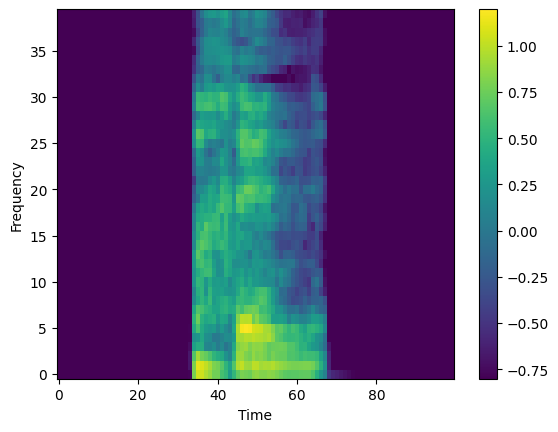

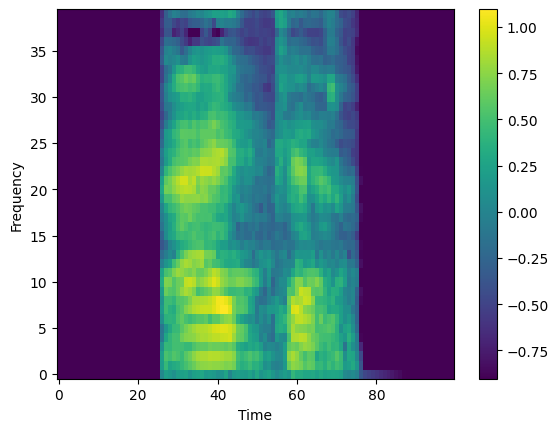

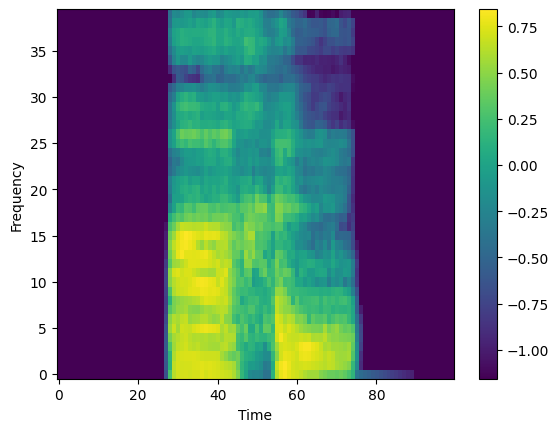

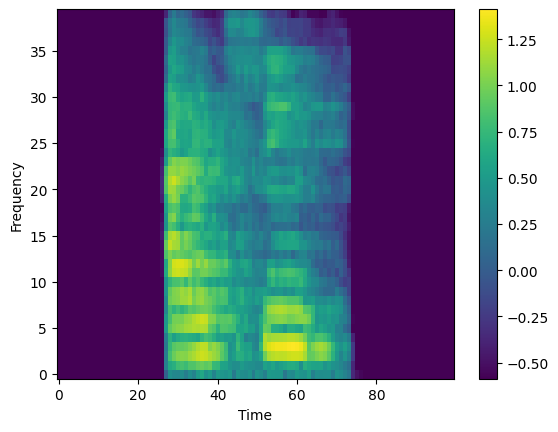

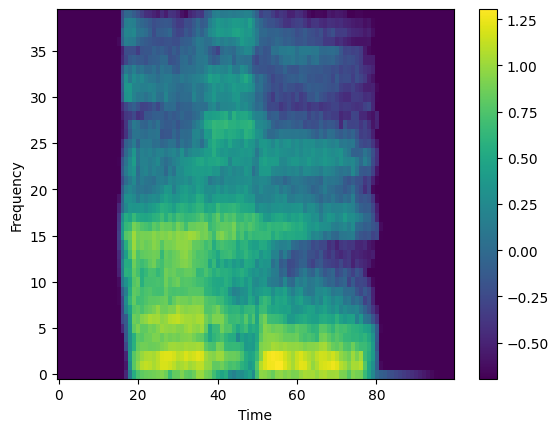

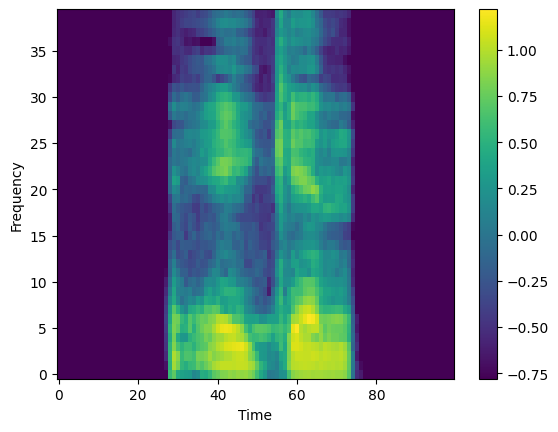

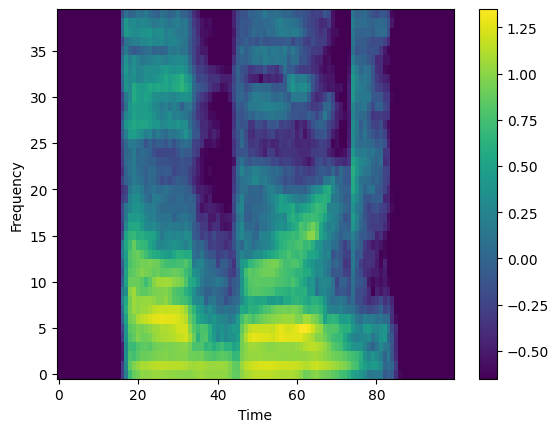

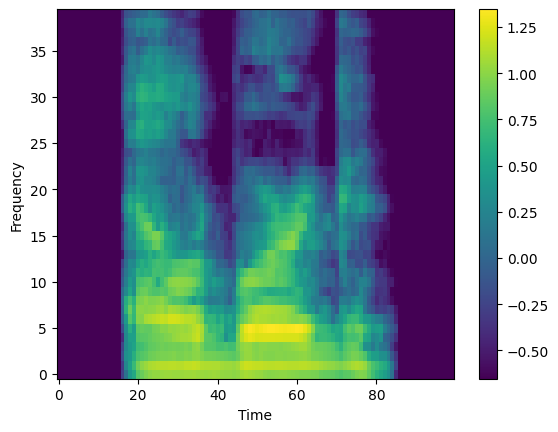

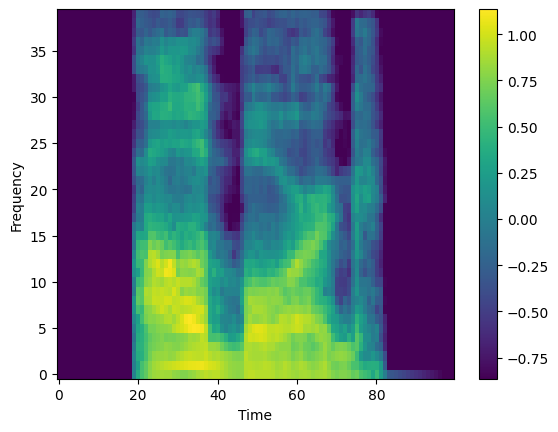

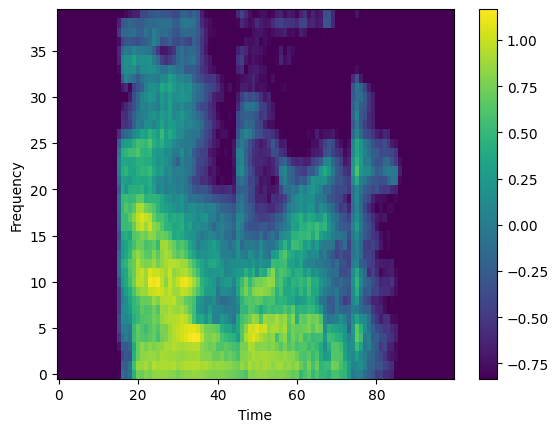

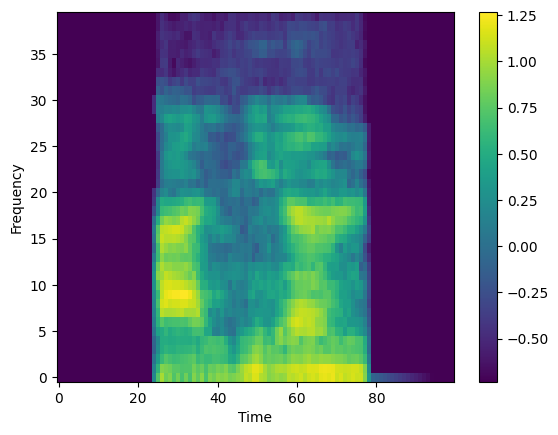

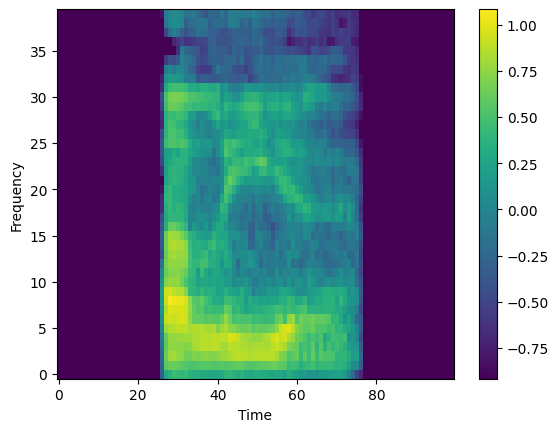

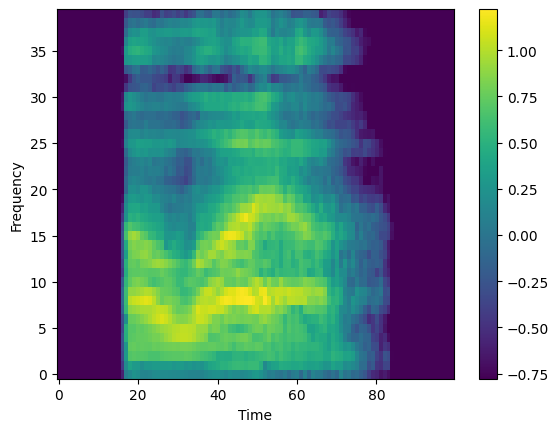

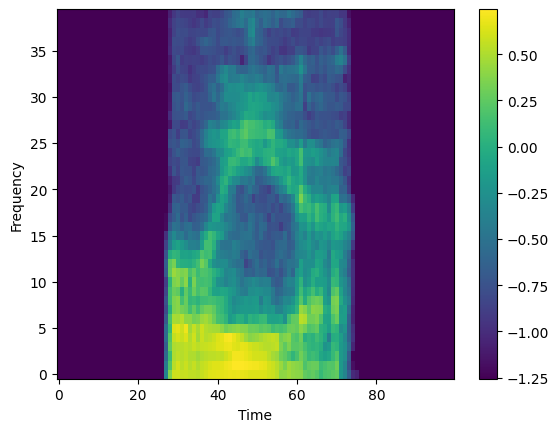

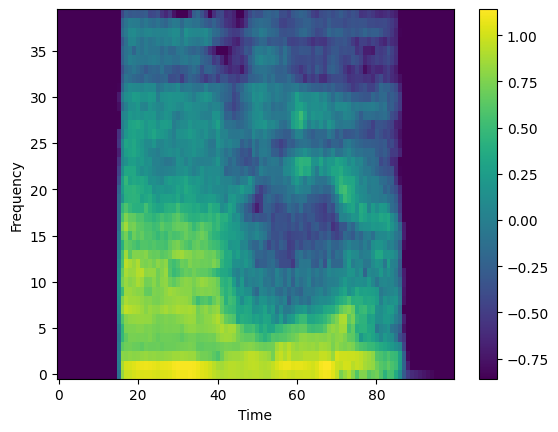

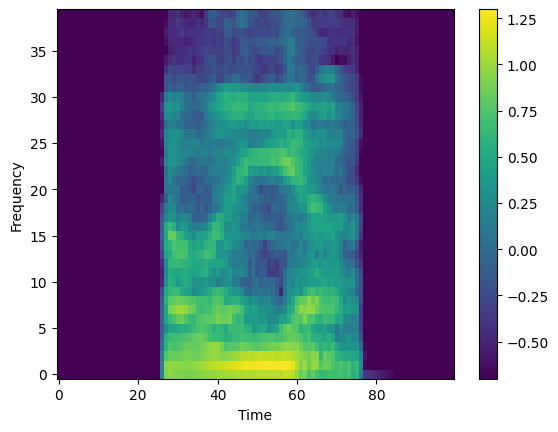

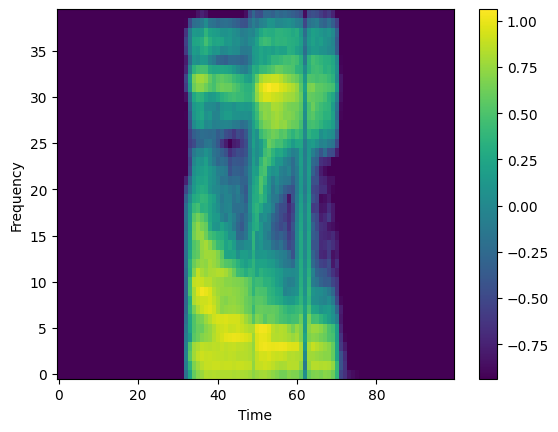

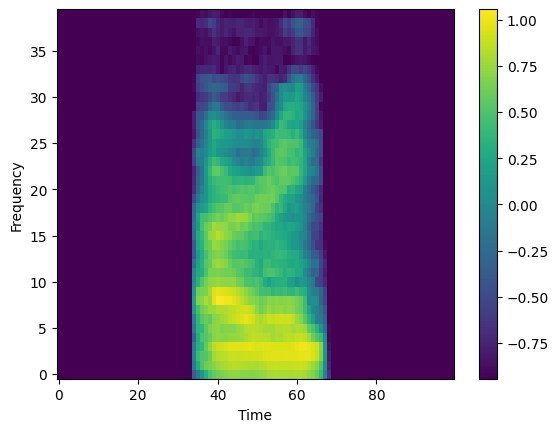

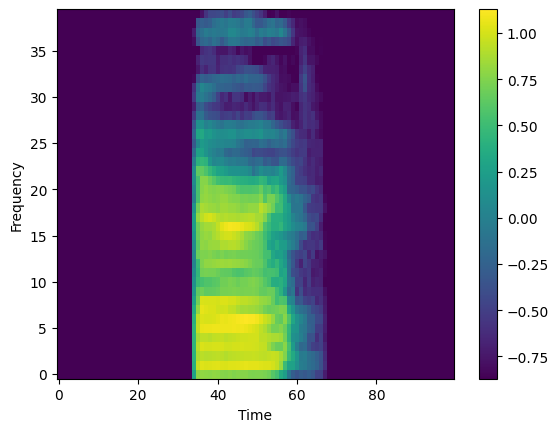

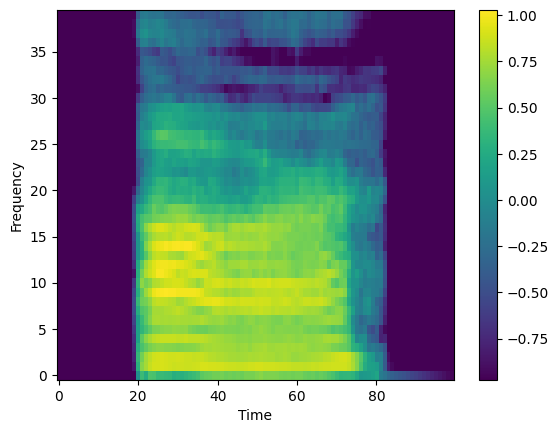

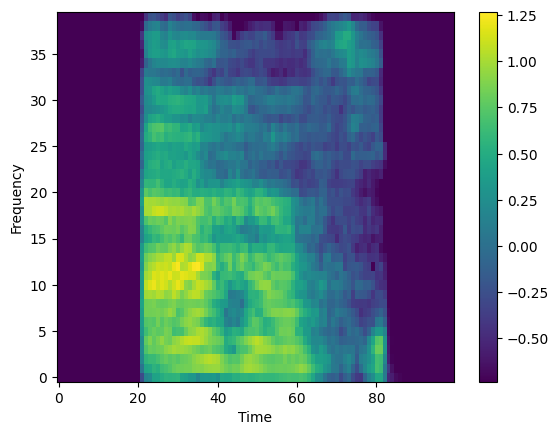

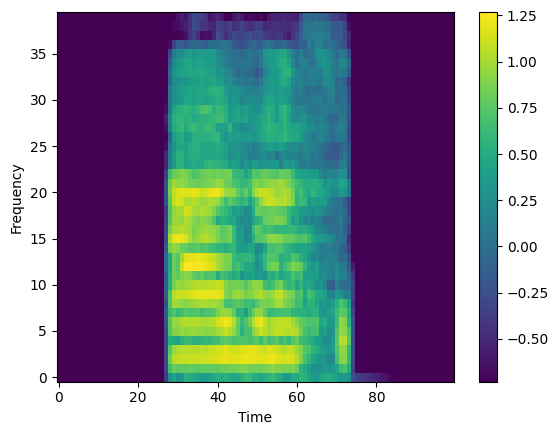

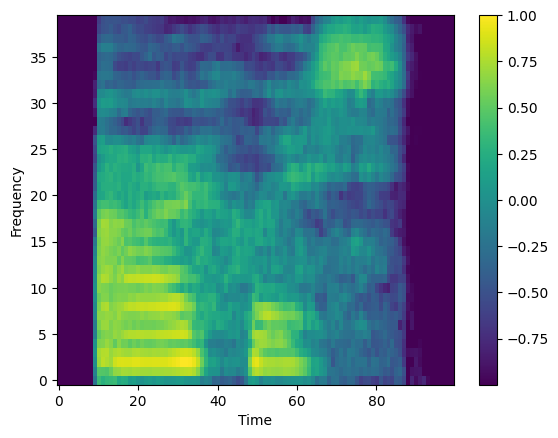

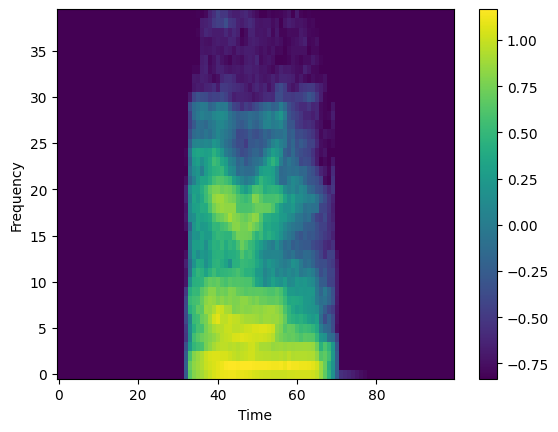

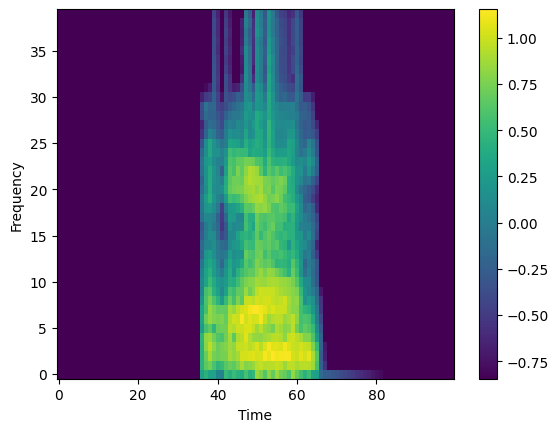

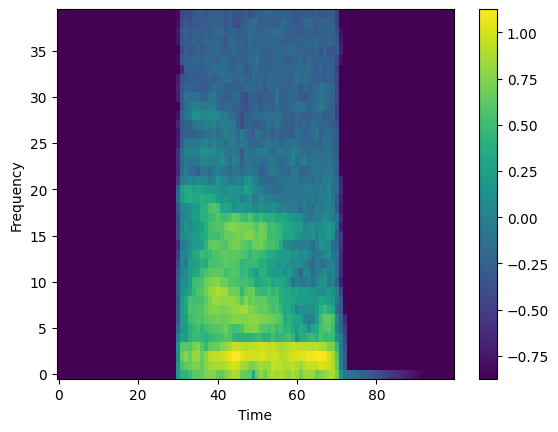

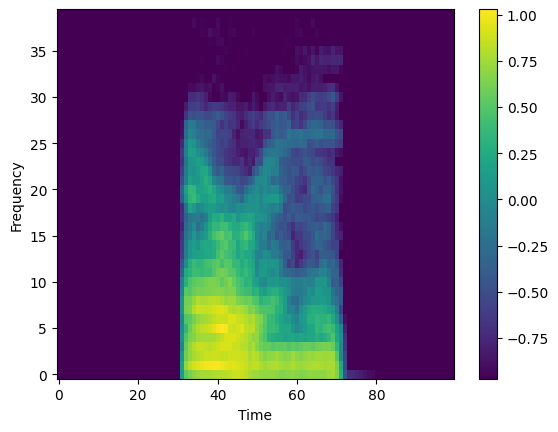

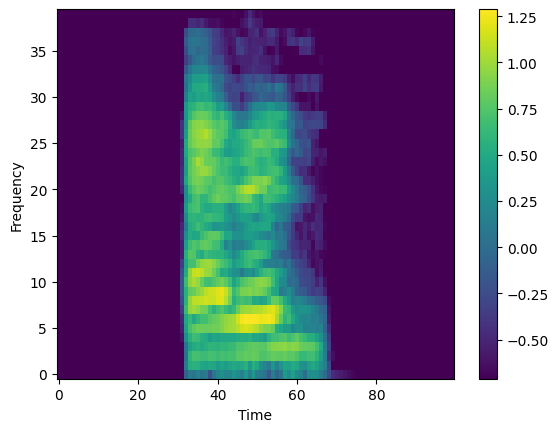

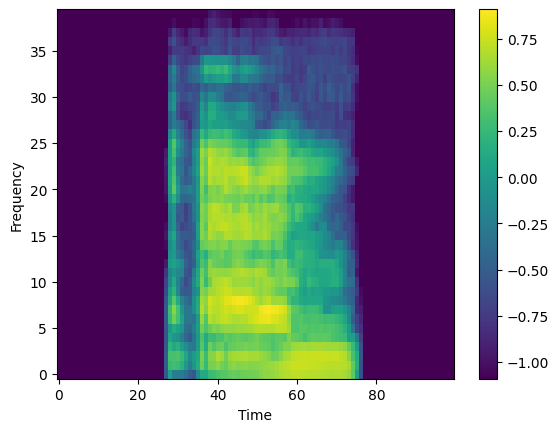

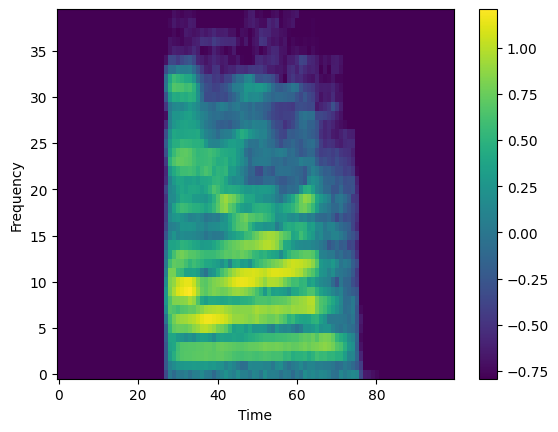

In [93]:
for s in train_dataset.input_data:
    plot_spectrogram(s)

In [70]:
def plot_spectrogram_1(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

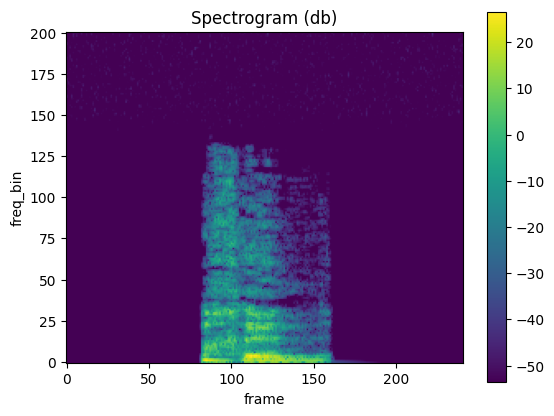

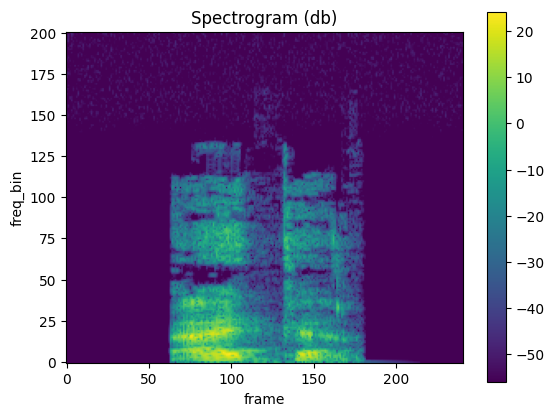

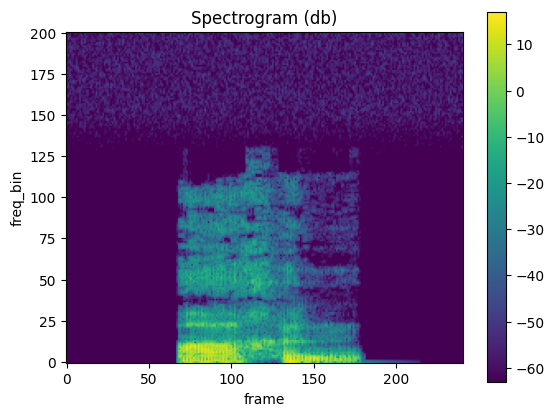

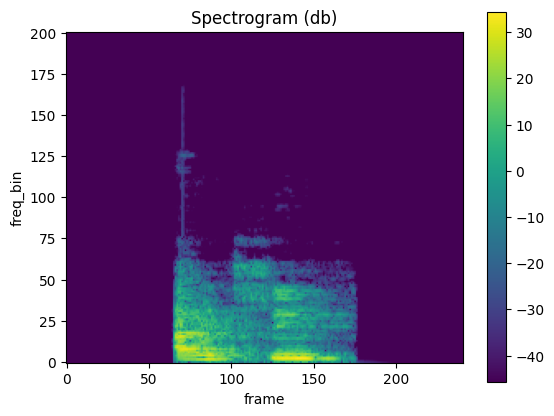

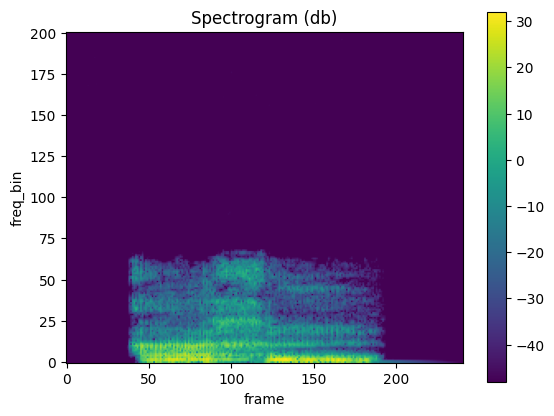

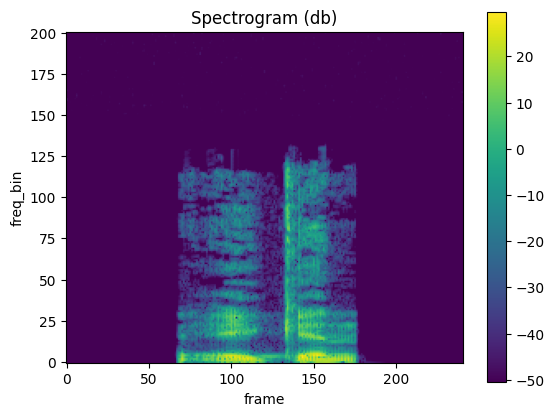

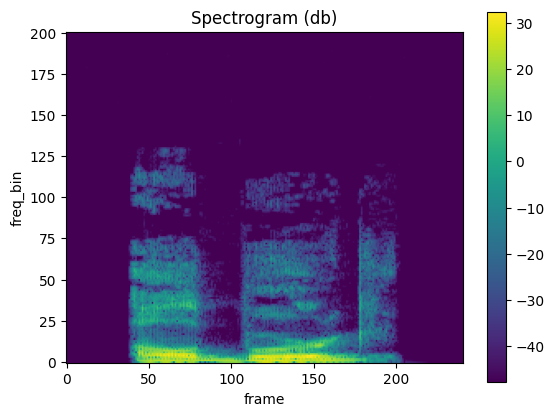

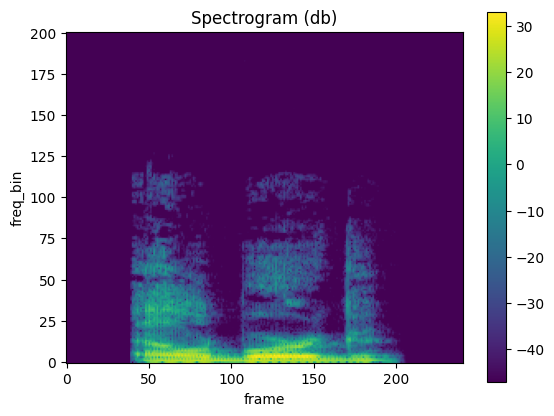

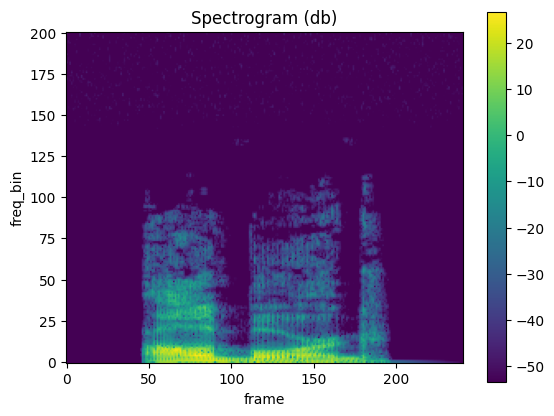

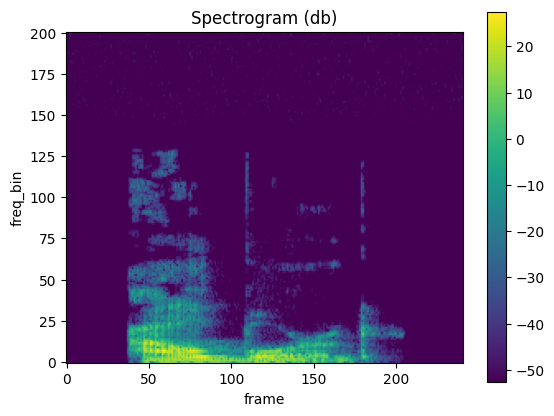

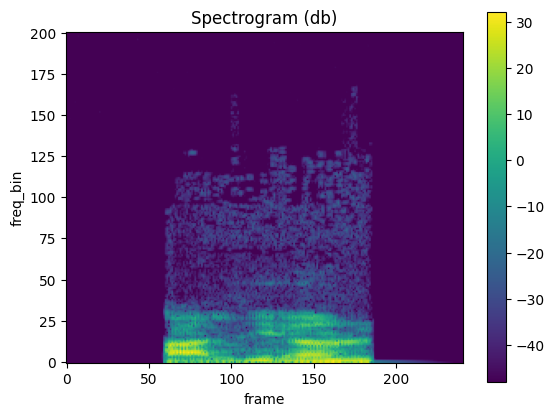

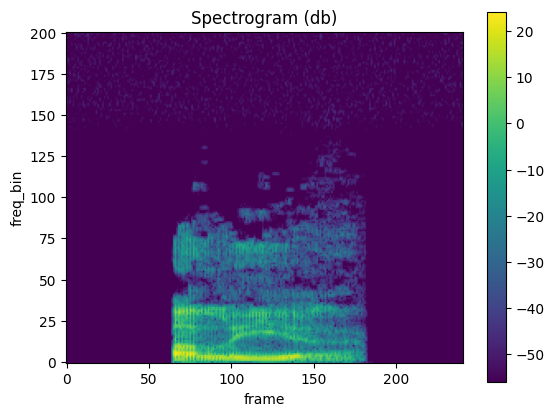

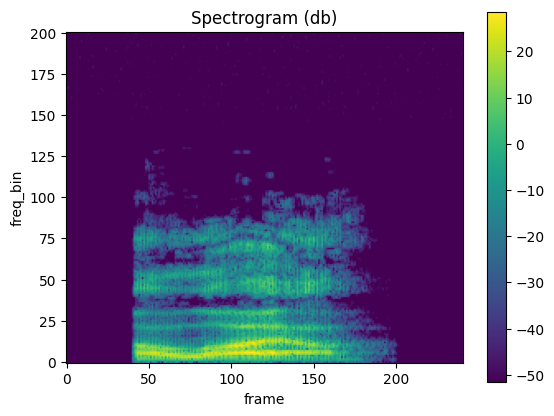

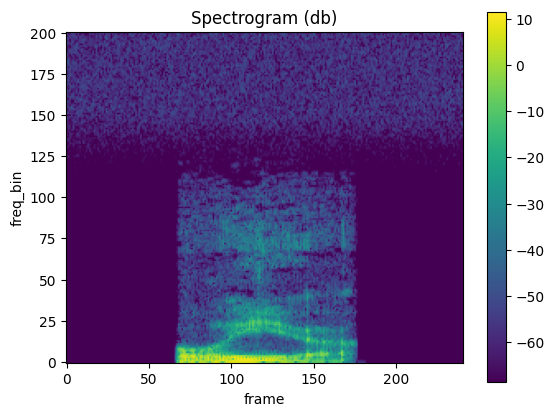

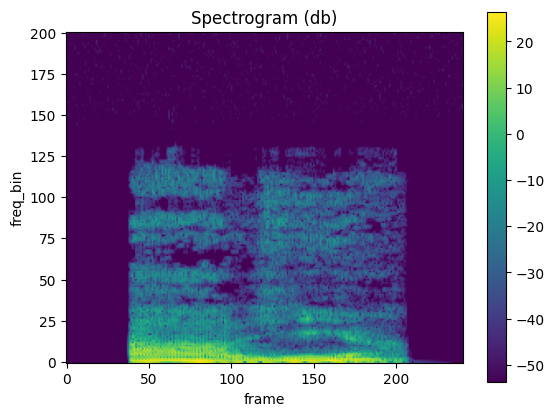

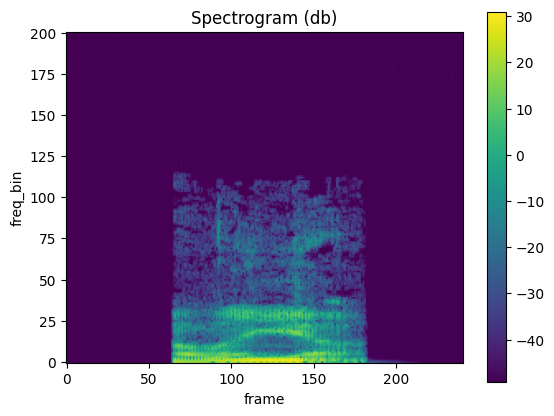

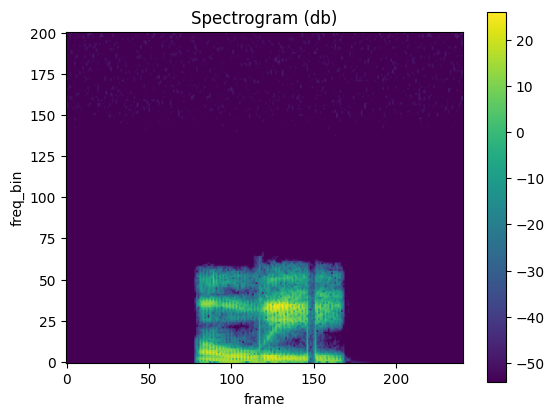

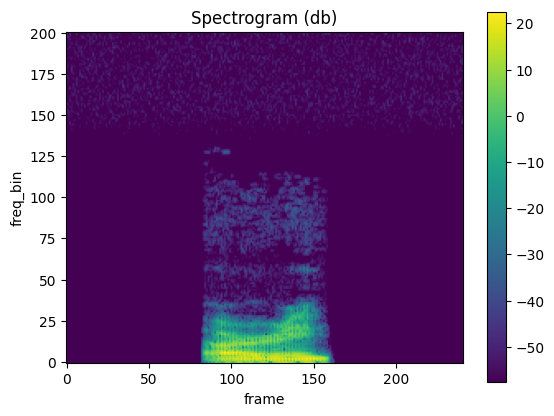

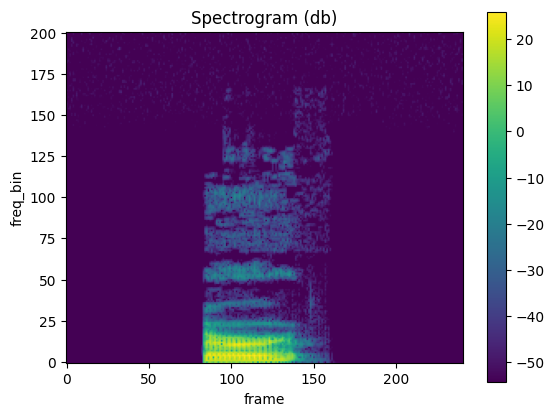

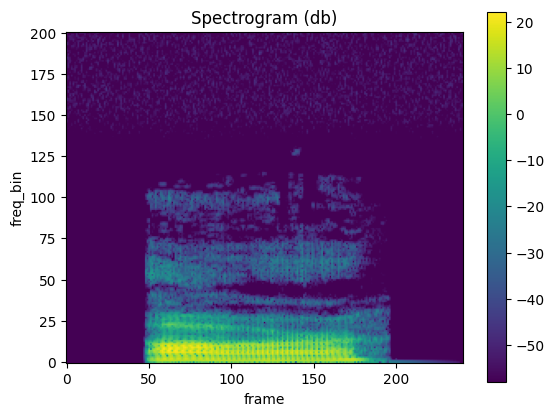

In [89]:
for f in fl:
    waveform, sample_rate = torchaudio.load(f)
    transform = torchaudio.transforms.Spectrogram()
    spectrogram = transform(waveform)
    plot_spectrogram_1(spectrogram[0])


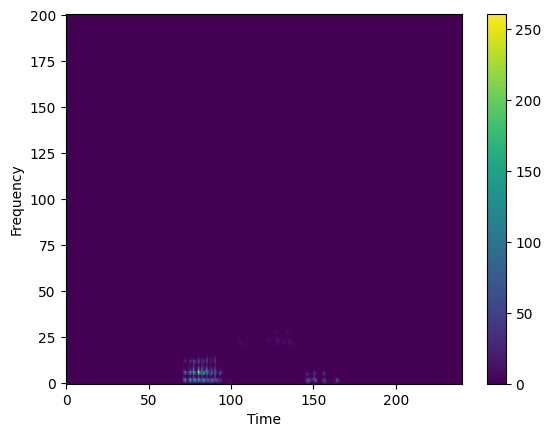

In [62]:
waveform, sample_rate = torchaudio.load(opus_file, normalize=True,)
transform = torchaudio.transforms.Spectrogram(center=True,win_length=None)
spectrogram = transform(waveform)
plot_spectrogram(spectrogram[0])

In [ ]:
# Most frequent keywords 
# Increase in number of keywords - time, accuracy
# How to include background (slice of ends?)


In [ ]:
batch_size = 64

train_dataset = prepare_dataset(train_files)
assert len(train_dataset) == 22437

print("Preparation successful!")

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
for train_token_batch, train_tag_batch in train_dataloader:
    assert train_token_batch.shape == torch.Size([batch_size, 3, LONGEST_SENTENCE])
    assert train_tag_batch.shape == torch.Size([batch_size, LONGEST_SENTENCE])
    break
    
print('Success!')

In [19]:
path = '../data/'
name = 'common_voice_en_18833718.opus'
opus_file = path  + name
wav_file = path  + name[:-5] + '.wav'
print(opus_file)

../data/common_voice_en_18833718.opus


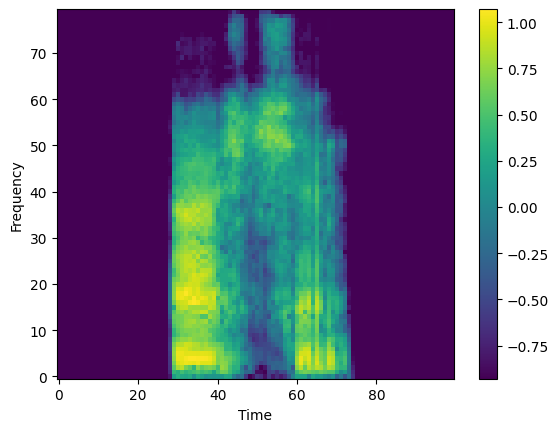

In [22]:
plot_spectrogram(get_audio_features(opus_file))